## 1. General Semantics
Two tensors are `'brodcastable'` if the following rules hold:
- Each tensor has atleast one dimension
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

Like:


In [4]:
import torch

x = torch.empty(5, 7, 3)
y = torch.empty(5, 7, 3)
# Same shapes are always brodcastable

In [5]:
# X and Y are not brodcastable, because x does not have atleast one dimension.
x = torch.empty((0,))
y = torch.empty(2, 2)

In [6]:
# Can lineup trailing dimensions
x = torch.empty(5, 3, 4, 1)
y = torch.empty(3, 1, 1)

# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

In [7]:
# But
x = torch.empty(5, 2, 4, 1)
y = torch.empty(3, 1, 1)

# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

If two tensors ```x```, ```y``` are `"brodcastable"`, the resulting tensor size is calculated as:
- If the number of dimensions of `x` and `y` are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
- Then, for each dimension size, the resulting dimension size is the max of the sizes of `x` and `y` along that dimension.

In [8]:
# This can line up trailing dimensions to make reading easier
x = torch.empty(5, 1, 4, 1)
y = torch.empty(3, 1, 1)

(x + y).size()

torch.Size([5, 3, 4, 1])

In [9]:
# Not Necessary
x = torch.empty(1)
y = torch.empty(3, 1, 7)
(x+y).size()

torch.Size([3, 1, 7])

In [10]:
x = torch.empty(5,2,4,1)
y = torch.empty(3,1,1)

(x+y).size()

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

## 2. In-place Semantics
One complication is that in-place operations do not allow the in-place tensor to change shape as default shape as a result of the broadcast.


In [11]:
x = torch.empty(5, 3, 4, 1)
y = torch.empty(3, 1, 1)
(x.add_(y)).size()

torch.Size([5, 3, 4, 1])

In [12]:
# BUT
x = torch.empty(1, 3, 1)
y = torch.empty(3, 1, 7)
(x.add_(y)).size()

RuntimeError: output with shape [1, 3, 1] doesn't match the broadcast shape [3, 3, 7]

## 3. Backwards Compatibilty
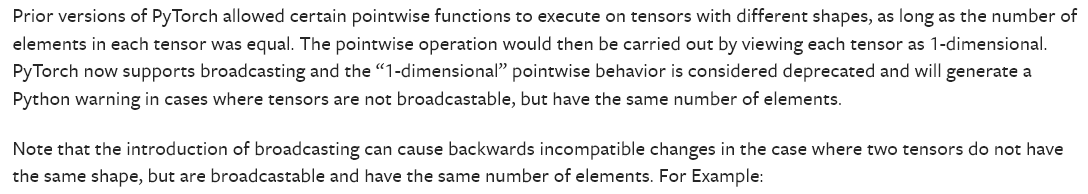

In [13]:
torch.add(torch.ones(4, 1), torch.randn(4))

tensor([[ 0.2851, -0.0700,  0.3171,  1.2165],
        [ 0.2851, -0.0700,  0.3171,  1.2165],
        [ 0.2851, -0.0700,  0.3171,  1.2165],
        [ 0.2851, -0.0700,  0.3171,  1.2165]])

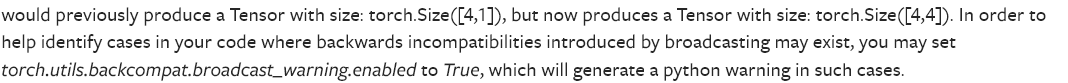

In [14]:
torch.utils.backcompat.broadcast_warning.enabled = True
torch.add(torch.ones(4, 1), torch.ones(4))

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])